In [23]:
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
%matplotlib inline

O Matplotlib gera os gráficos em **Figure**. Cada  uma delas pode conter um ou mais **Axes**, área na qual pontos podem ser especificados em termos de coordenadas x-y. A forma mais simples de criar uma figura com um axes é utilizando **pyplot.subplots** ou **plt.subplots**. Podemos então desenhar algo no Axes a mostrar a figura:

In [45]:
# Criando array de dados para plotagem
x = np.array(np.linspace(-10,10,100))
y = x**2

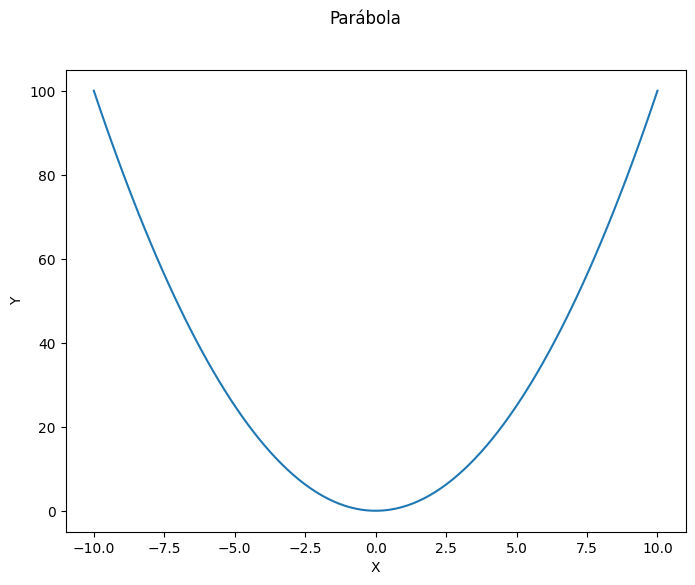

In [46]:
figura = plt.figure(figsize=(8,6))
figura.suptitle('Parábola')
ax = figura.add_subplot()
plt.plot(x,y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [44]:
figura.savefig('Figura 1.png', dpi=300)

In [50]:
a = np.random.normal(loc=10, scale=2, size=10000)

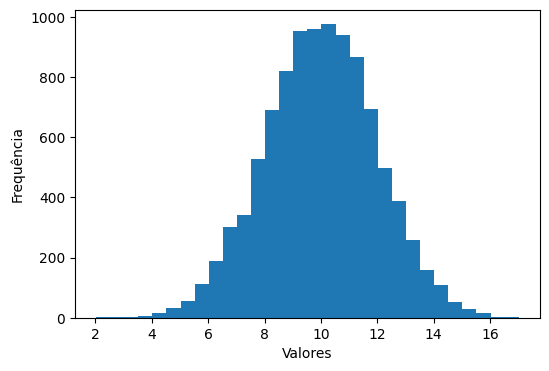

In [55]:
figura_normal = plt.figure(figsize=(6,4))
ax = figura_normal.add_subplot()
plt.hist(a, bins=30)
plt.xlabel('Valores')
plt.ylabel('Frequência')
plt.show()